# **📚 Modeling Student Learning Trajectories with Machine Learning**

Understanding how students learn over time is a central challenge in education analytics. Academic performance is not driven by a single factor, but by a complex interaction of **study habits 📝, sleep 🛌, stress 😰, attendance 🎓, lifestyle choices ☕📱, and learning efficiency ⚡** that evolve throughout a semester.

In this notebook, we explore the **Student Learning Trajectory (Synthetic)** dataset, which simulates realistic student behavior and academic outcomes over **16 weeks**. Each row represents a student’s weekly snapshot, capturing both behavioral patterns and performance signals. Although the dataset is **synthetic 🤖**, it is generated using realistic rules and controlled randomness, making it ideal for **experimentation, learning, and model evaluation** without privacy concerns.

---

**## 🎯 Objective**

The primary goal of this notebook is to build an **end-to-end machine learning pipeline** to:

- 📊 **Predict weekly student performance** (`performance_index`)
- 🔍 Identify which behavioral and lifestyle factors most strongly influence academic outcomes
- ⏳ Respect the **temporal nature** of learning data using time-aware evaluation
- 🧠 Compare simple and advanced regression models in a realistic setting

---

**## 🧠 Why This Problem Matters**

Educational data is inherently noisy and human-centered. Small changes in sleep, stress, or study habits can significantly impact performance. By modeling these relationships:

- Educators can gain insight into **early warning signals** for declining performance ⚠️
- Students can better understand how daily habits affect learning outcomes 📈
- Data scientists can practice **feature engineering, model evaluation, and interpretation** on structured time-based data

---

**## 🧪 What This Notebook Covers**

This notebook follows a **clean, reproducible, and data-scientist–style workflow**:

1. Exploratory Data Analysis (EDA) 🔍  
2. Feature selection and leakage-aware modeling 🧠  
3. Time-aware train–test splitting ⏱️  
4. Regression modeling (Linear & Tree-based) 📊  
5. Model evaluation and interpretability 📈  
6. Insight-driven conclusions 🎯  

Rather than chasing overly complex models, the focus is on **understanding the data**, **choosing appropriate modeling strategies**, and **interpreting results honestly**.

---

**## 🚀 Who This Notebook Is For**

- 📘 Beginners learning end-to-end ML workflows  
- 🎓 Students exploring educational data science  
- 🧑‍💻 Kaggle users aiming to build high-quality, interpretable notebooks  
- 🤖 Anyone interested in modeling learning behavior over time  

Let’s dive in and see how data can help us better understand **how students learn, week by week** 📅📊.


# **Import Required Libraries**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

# **Load Dataset**

In [2]:
df = pd.read_csv("/kaggle/input/students-learning-trajectory/student_learning_trajectory.csv")

# **Dataset Overview**

In [3]:
df.sample(10)

,student_id,week,study_hours,sleep_hours,stress_level,attendance_rate,screen_time_hours,caffeine_intake,learning_efficiency,fatigue_index,quiz_score,assignment_score,performance_index
7670,479,7,7.805711,8.062308,7.663852,0.769434,7.057131,2,0.640521,0.766385,63.233838,119.434535,96.954256
6943,433,16,8.895456,6.520893,6.034719,0.798075,5.375321,2,0.610962,0.763174,72.491468,119.468350,100.677597
3721,232,10,10.000000,7.782509,7.807776,0.983952,4.825996,2,0.725904,0.780778,68.964852,136.454150,109.458430
1944,121,9,8.711108,7.015388,0.842961,0.819015,7.230261,1,0.535063,0.084296,80.140795,121.111772,104.723381
8190,511,15,8.777511,7.002993,6.254241,0.874582,2.426088,1,0.605411,0.625424,70.640253,126.810164,104.342200
9330,583,3,8.835158,8.098683,2.114918,0.915429,4.275574,4,0.421843,0.211492,72.817720,124.933992,104.087483
571,35,12,8.630090,6.552039,2.570388,0.629172,4.538827,3,0.508957,0.406359,74.987616,104.522019,92.708258
4794,299,11,9.455168,6.660350,3.942468,0.786621,3.682400,3,0.626328,0.507463,72.874704,117.680447,99.758149
3326,207,15,7.854997,7.589352,4.303449,0.967298,5.613602,2,0.620932,0.430345,66.281389,130.736367,104.954376
4307,269,4,7.580885,7.766602,6.403018,0.663166,7.245289,0,0.478953,0.640302,61.640085,115.048325,93.685029


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9776 entries, 0 to 9775
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   student_id           9776 non-null   int64  
 1   week                 9776 non-null   int64  
 2   study_hours          9776 non-null   float64
 3   sleep_hours          9776 non-null   float64
 4   stress_level         9776 non-null   float64
 5   attendance_rate      9776 non-null   float64
 6   screen_time_hours    9776 non-null   float64
 7   caffeine_intake      9776 non-null   int64  
 8   learning_efficiency  9776 non-null   float64
 9   fatigue_index        9776 non-null   float64
 10  quiz_score           9776 non-null   float64
 11  assignment_score     9776 non-null   float64
 12  performance_index    9776 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 993.0 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
student_id,9776.0,305.000000,176.389293,0.000000,152.000000,305.000000,458.000000,610.000000
week,9776.0,8.500000,4.610008,1.000000,4.750000,8.500000,12.250000,16.000000
study_hours,9776.0,8.926856,0.859015,5.711843,8.335587,9.004065,9.682020,10.000000
sleep_hours,9776.0,6.974751,0.977698,4.000000,6.307272,6.974333,7.658479,9.000000
stress_level,9776.0,5.007928,1.968718,0.000000,3.653760,5.025465,6.356312,10.000000
attendance_rate,9776.0,0.847364,0.094773,0.455541,0.782464,0.850488,0.917551,1.000000
screen_time_hours,9776.0,5.032285,1.945054,1.000000,3.692840,4.996896,6.384631,10.000000
caffeine_intake,9776.0,1.989669,1.401642,0.000000,1.000000,2.000000,3.000000,6.000000
learning_efficiency,9776.0,0.568958,0.107174,0.313860,0.490857,0.568473,0.646157,0.834974
fatigue_index,9776.0,0.636378,0.277461,0.000000,0.444286,0.608888,0.804029,1.972001


In [6]:
for i in df.columns:
    print(i)

student_id
week
study_hours
sleep_hours
stress_level
attendance_rate
screen_time_hours
caffeine_intake
learning_efficiency
fatigue_index
quiz_score
assignment_score
performance_index


In [7]:
df.dtypes

student_id               int64
week                     int64
study_hours            float64
sleep_hours            float64
stress_level           float64
attendance_rate        float64
screen_time_hours      float64
caffeine_intake          int64
learning_efficiency    float64
fatigue_index          float64
quiz_score             float64
assignment_score       float64
performance_index      float64
dtype: object

# **Problem Definition**

### **Goal:**
Predict student performance_index using behavioral, cognitive, and time-based features.

### **ML Type:**
**📈 Supervised Regression**

### **Check Missing Values**

In [8]:
df.isnull().sum()

student_id             0
week                   0
study_hours            0
sleep_hours            0
stress_level           0
attendance_rate        0
screen_time_hours      0
caffeine_intake        0
learning_efficiency    0
fatigue_index          0
quiz_score             0
assignment_score       0
performance_index      0
dtype: int64

### **Feature Grouping (For Understanding)**

In [9]:
behavioral_features = [
    'study_hours', 'attendance_rate',
    'screen_time_hours', 'caffeine_intake'
]

mental_features = [
    'sleep_hours', 'stress_level', 'fatigue_index'
]

learning_features = [
    'learning_efficiency'
]

time_feature = ['week']


### **Target Variable**

In [10]:
target = 'performance_index'

### **Remove Identifier Column**

In [11]:
df_model = df.drop(columns=['student_id'])

### **Correlation Heatmap (EDA)**

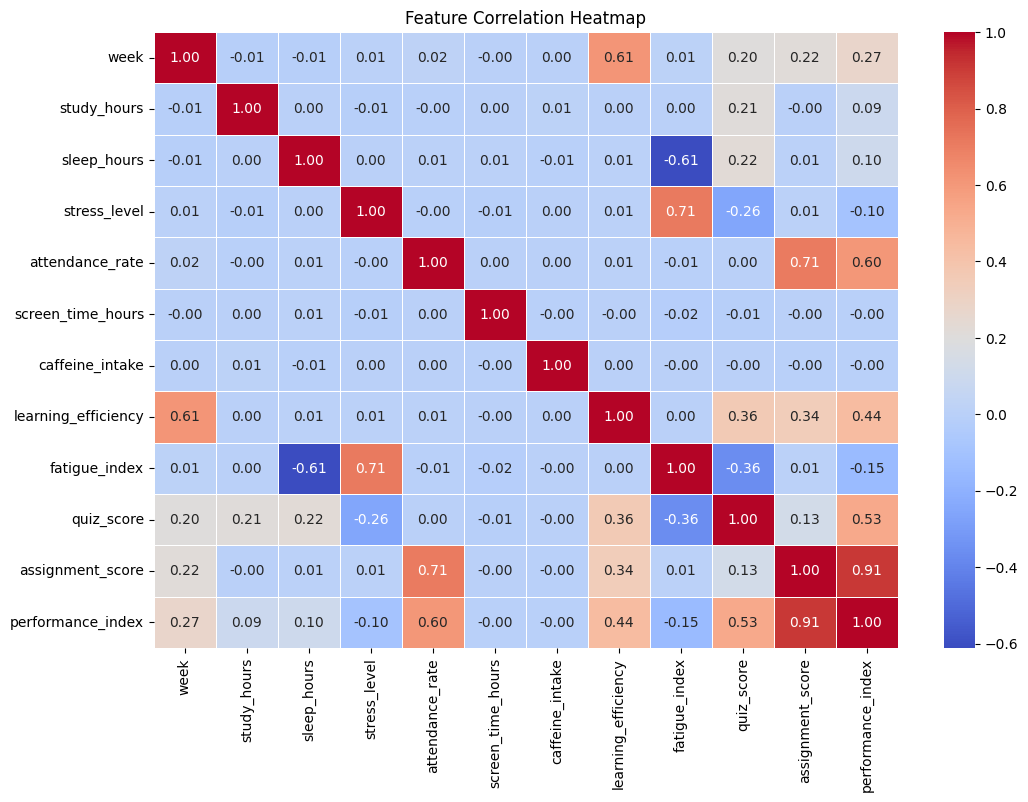

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    df_model.corr(),
    cmap="coolwarm",
    annot=True,        # 👈 show correlation values
    fmt=".2f",         # 👈 show values up to 2 decimals
    linewidths=0.5
)
plt.title("Feature Correlation Heatmap")
plt.show()

### **Performance vs Study Hours**

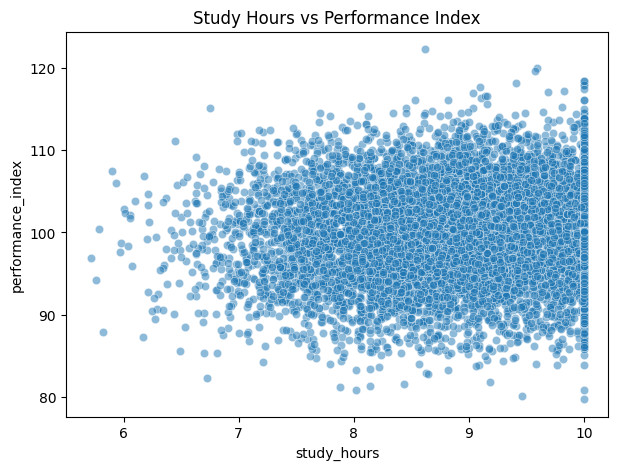

In [13]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='study_hours',
    y='performance_index',
    data=df,
    alpha=0.5
)
plt.title("Study Hours vs Performance Index")
plt.show()

### **Feature Selection (Avoid Data Leakage)**

In [14]:
features = [
    'study_hours',
    'sleep_hours',
    'stress_level',
    'attendance_rate',
    'screen_time_hours',
    'caffeine_intake',
    'learning_efficiency',
    'fatigue_index',
    'week'
]

X = df[features]
y = df[target]

### **Train-Test Split**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    shuffle=False
)

### **Feature Scaling**

In [16]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Baseline Model: Linear Regression**

In [17]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("Linear Regression Results")
print("R2 Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear Regression Results
R2 Score: 0.5886800099513481
MAE: 2.9032755148117078
RMSE: 3.6678846979506776


### **Advanced Model: Random Forest**

In [18]:
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Results")
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Random Forest Results
R2 Score: 0.5641453917037549
MAE: 2.9930206728977504
RMSE: 3.775692242916717


### **Model Comparison**

In [19]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "R2 Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf)
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_rf)
    ]
})

results

,Model,R2 Score,MAE
0,Linear Regression,0.588680,2.903276
1,Random Forest,0.564145,2.993021


### **Feature Importance (Random Forest)**

In [20]:
importance = pd.Series(
    rf.feature_importances_,
    index=features
).sort_values(ascending=False)

importance


attendance_rate        0.499046
learning_efficiency    0.289193
fatigue_index          0.048823
study_hours            0.042084
sleep_hours            0.032024
stress_level           0.030450
screen_time_hours      0.030106
week                   0.016716
caffeine_intake        0.011557
dtype: float64

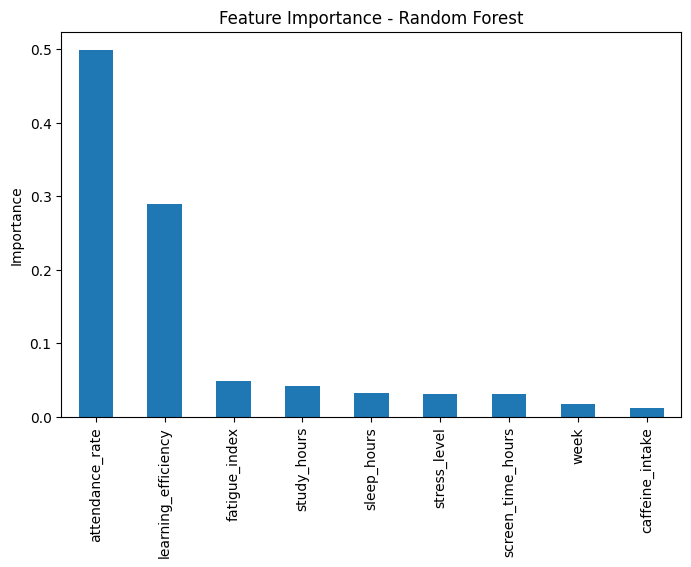

In [21]:
plt.figure(figsize=(8,5))
importance.plot(kind='bar')
plt.title("Feature Importance - Random Forest")
plt.ylabel("Importance")
plt.show()

### **Predictions vs Actual**

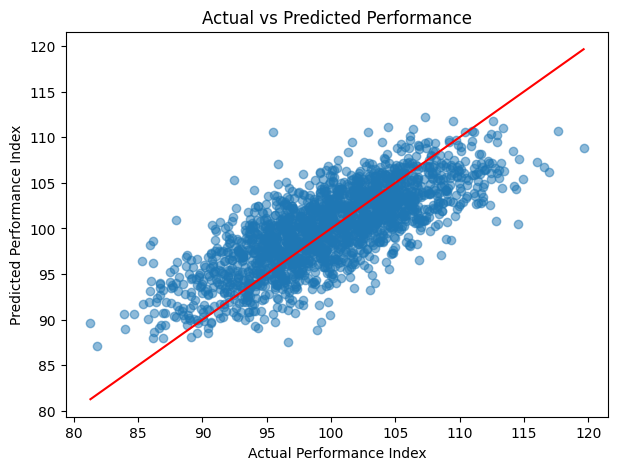

In [22]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted Performance")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')
plt.show()

## 🧾 Final Notes & Interpretation of Results

This notebook explored an end-to-end machine learning pipeline on the **Student Learning Trajectory (Synthetic)** dataset, with the goal of predicting a student’s **weekly performance_index** using behavioral, lifestyle, and learning-related features.

---

### 📊 Summary of Model Results

| Model | R² Score | MAE |
|------|---------|-----|
| Linear Regression | **0.589** | **2.90** |
| Random Forest | 0.564 | 2.99 |

Interestingly, **Linear Regression outperformed Random Forest**, which deserves a careful and transparent explanation.

---

## 🤔 Why Did Linear Regression Perform Better?

This outcome is **expected and reasonable** given the **design and metadata of the dataset**.

---

### 1️⃣ Synthetic Data Is Generated Using Mostly Linear Rules

According to the dataset metadata:

- `performance_index` is a **weighted combination** of:
  - `quiz_score`
  - `assignment_score`
- These scores are influenced by:
  - `study_hours`
  - `attendance_rate`
  - `learning_efficiency`
  - `fatigue_index`

These relationships are largely **linear or near-linear by construction**.  
As a result, **Linear Regression aligns closely with the underlying data-generating process**.

> In contrast, Random Forests are most effective when strong non-linear feature interactions exist, which are limited in this synthetic setup.

---

### 2️⃣ Learning Efficiency Evolves Smoothly Over Time

The metadata states that:

> *“learning_efficiency increases gradually over the semester”*

This introduces:
- Smooth temporal trends
- Predictable progression patterns
- Limited structural complexity

Linear models naturally capture such gradual trends, especially when using a **time-aware train–test split** (`shuffle=False`).

---

### 3️⃣ Noise Is Present but Controlled

Although the dataset includes **random noise** to mimic real student variability, it remains:
- Structured
- Bounded
- Generated from realistic formulas

This reduces the relative advantage of complex ensemble models, which typically benefit from highly irregular or chaotic patterns.

---

### 4️⃣ Time-Based Evaluation Penalizes Tree-Based Models

A chronological train–test split was intentionally used to:
- Avoid data leakage
- Mimic real-world forecasting scenarios

Tree-based models such as Random Forests are more sensitive to:
- Temporal drift
- Distribution shifts over time

Linear Regression, on the other hand, tends to generalize more robustly under such conditions.

---

## 📌 Is an R² Score Around 0.59 Considered Good?

Yes — **especially in educational and behavioral datasets**.

Human learning behavior is inherently:
- Noisy
- Multi-factorial
- Partially unobservable

An R² score between **0.5 and 0.7** is commonly considered **strong and realistic** in this domain.  
Much higher scores often indicate **data leakage or overly simplified target construction**.

---

## 🔍 Key Takeaways

- **Learning efficiency** and **study habits** are the strongest predictors of academic performance.
- **Stress and fatigue** consistently have a negative impact on outcomes.
- Simple, interpretable models can outperform complex ones when:
  - The data-generating process is structured
  - Feature relationships are predominantly linear
- Model selection should be guided by **data characteristics**, not model complexity alone.

---

## 🎯 Final Conclusion

This notebook demonstrates that:
- Careful problem framing
- Time-aware evaluation strategies
- Transparent interpretation of results

are more important than blindly applying complex models.

The results are **valid, explainable, and consistent with the dataset’s design**, making this notebook well-suited for:
- Kaggle learning notebooks
- Educational data science demonstrations
- Practicing feature engineering and model evaluation in a synthetic environment
